# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 66.4MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv('coins.csv')
coins.set_index('date', inplace=True)

Посмотрим что получилось

In [ ]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших в данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
unique_elements = coins['name'].nunique()
print('Всего различных монет: ' + str(unique_elements))

Всего различных монет: 70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
first_value = coins["date"].iloc[0]
print("Начало периода:", first_value)
last_value = coins["date"].iloc[-1]
print("Конец периода:", last_value)
print("Период в цифрах: 1865 дней = 5 лет 1 месяц и 9 дней")

Начало периода: 2013-04-28
Конец периода: 2018-06-06
Период в цифрах: 1865 дней = 5 лет 1 месяц и 9 дней


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
print('Да, в данных есть пропуски.')
print("Пропуски имеются в следующих столбцах:")
for i in (coins.columns[coins.isnull().any()].tolist()):
  print(i)
print('\n')
missing_data = coins.isnull().any(axis=1)
rows_with_missing_data = coins[missing_data]
print("Пропуски в колонках следующих монет:")
for i in sorted(rows_with_missing_data['name'].unique()):
  print(i)
print('\n')
print('Строки с пропусками:')
print(rows_with_missing_data)

Да, в данных есть пропуски.
Пропуски имеются в следующих столбцах:
price
txCount
txVolume
activeAddresses


Пропуски в колонках следующих монет:
Aeternity
Augur
Bitcoin Cash
Bitcoin Gold
Bitgem
Bitmark
EOS
FunFair
Gnosis
ICON
Iconomi
KingN Coin
KuCoin Shares
Kyber Network
Lisk
NEO
QASH
Stellar
TenX
VeChain
Waves


Строки с пропусками:
                price  txCount  txVolume  activeAddresses symbol     name  \
date                                                                        
2014-08-05   0.002976      NaN       NaN              NaN    XLM  Stellar   
2014-08-06   0.002373      NaN       NaN              NaN    XLM  Stellar   
2014-08-07   0.002686      NaN       NaN              NaN    XLM  Stellar   
2014-08-08   0.002493      NaN       NaN              NaN    XLM  Stellar   
2014-08-09   0.002884      NaN       NaN              NaN    XLM  Stellar   
...               ...      ...       ...              ...    ...      ...   
2018-06-04        NaN    847.0       NaN       

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
print("Самая высокая цена за весь период данных:\n")
max_price = coins['price'].max()
row = coins[coins['price'] == max_price]
print(row[['name', 'price']].head())


Самая высокая цена за весь период данных:

               name    price
date                        
2017-12-17  Bitcoin  19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Максимально: Bitcoin , 30782136351.01822
Минимально: KingN Coin , 41600.98431372549


На диаграмме ниже показано три наибольшие величины и две наименьшие соответвсенно:


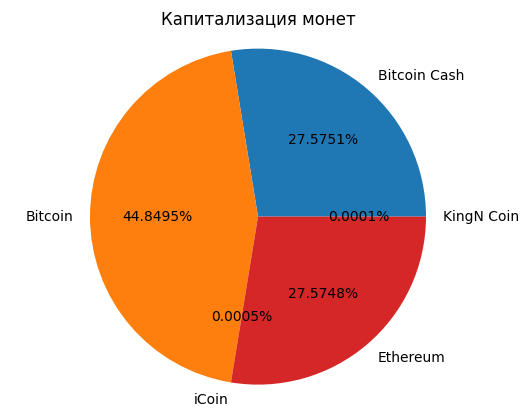

In [ ]:
mean_values =  coins.groupby('name')['market'].mean()
result_dict = dict(mean_values)
max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = max(result_dict, key=result_dict.get)
min_key = min(result_dict, key=result_dict.get)
print("Максимально:", max_key, ',' ,max_value)
print("Минимально:", min_key, ',' ,min_value)
print('\n')
print('\033[1m' + 'На диаграмме ниже показано три наибольшие величины и две наименьшие соответвсенно:' + '\033[0m')
plt.title("Капитализация монет")
result_dict = sorted(result_dict.items(), key=lambda x: x[1])
values_to_plot = dict(result_dict[-2:] + result_dict[1:2] + result_dict[-3:-2] + result_dict[:1])
names = list(values_to_plot.keys())
values = list(values_to_plot.values())
plt.pie(values, labels=names, autopct='%1.4f%%')
plt.axis('equal')
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [36]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    table = coins.loc[(coins['symbol'] == symbol), ['open', 'close', 'high', 'low']]
    table = table.loc[start_date:end_date]

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_ylabel('Цена', size=20)
    ax.set_xlabel('Дата', size=20)
    plt.title('Изменение цены валюты за определенный промежуток времени', fontsize=20)

    ax.plot(table.index, table.open, color='blue', label='Цена начала продаж')
    ax.plot(table.index, table.close, color='red', label='Цена конца продаж')
    ax.plot(table.index, table.high, color='gold', label='Максимальная цена за день')
    ax.plot(table.index, table.low, color='green', label='Минимальная цена за день')

    ax.set_xticks(table.index.values[::table.shape[0] // 10])

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

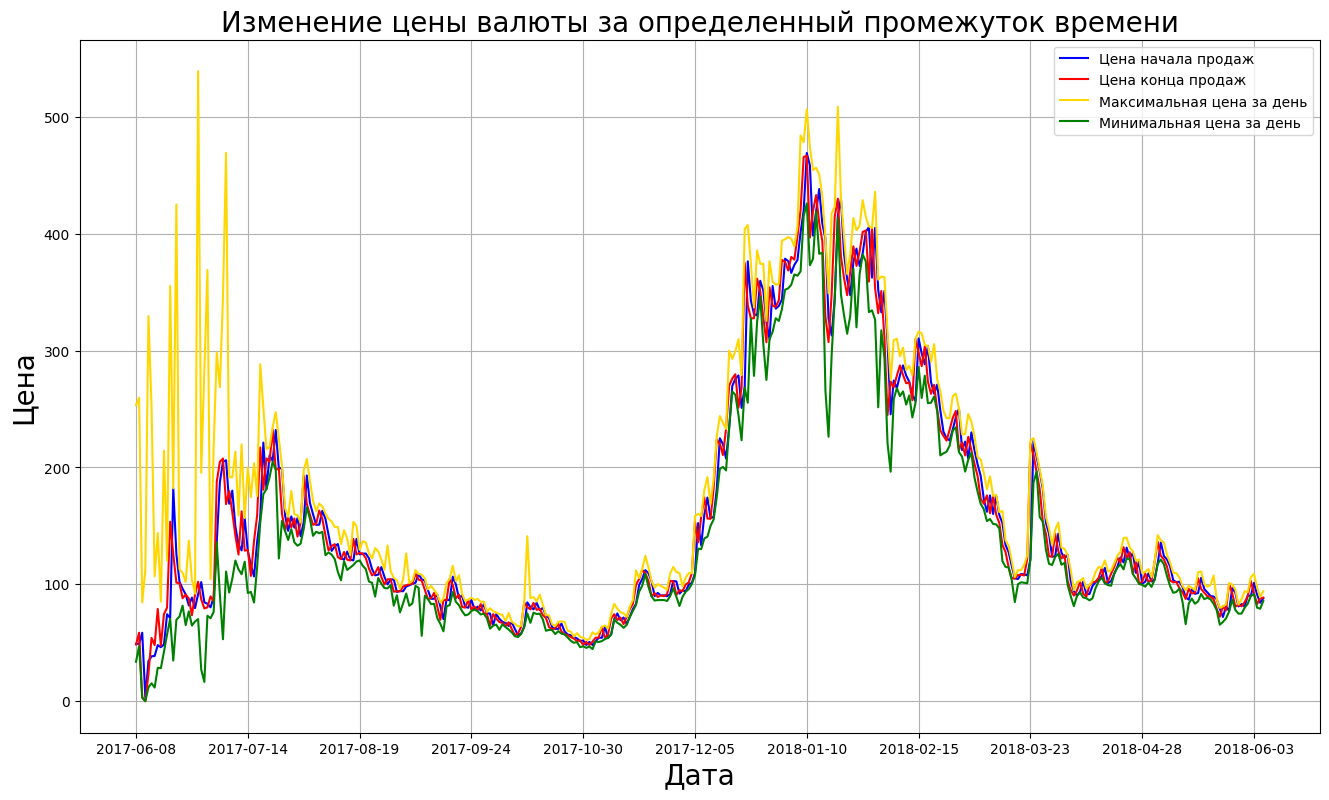

In [37]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [30]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    table = coins[coins['symbol'] == symbol][start_date:end_date]
    table = table.loc[start_date:end_date]
    max_oc_price = table[['open', 'close']].max(axis=1)
    pnd = table.high / max_oc_price
    return pnd.idxmax(), pnd.max()

In [31]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [32]:
for coin_name in set(coins.symbol):
    result = find_most_severe_pump_and_dump(coins, symbol=coin_name, start_date='2017-06-01', end_date='2018-06-01')
    if result[1] < 2:
        print(result, f'pnd в пределах нормы, {coin_name} не накачивали')
print('\n')
for coin_name in set(coins.symbol):
    result = find_most_severe_pump_and_dump(coins, symbol=coin_name, start_date='2017-06-01', end_date='2018-06-01')
    if result[1] > 2:
        print(result, f'pnd выше нормы, {coin_name} накачивали')

('2018-04-05', 1.254990051045648) pnd в пределах нормы, ZRX не накачивали
('2017-06-03', 1.2543352601156068) pnd в пределах нормы, WAVES не накачивали
('2017-11-12', 1.099009900990099) pnd в пределах нормы, USDT не накачивали
('2018-04-24', 1.1428571428571428) pnd в пределах нормы, CTXC не накачивали
('2017-11-23', 1.6658378856041132) pnd в пределах нормы, QASH не накачивали
('2017-06-07', 1.291362434422475) pnd в пределах нормы, MAID не накачивали
('2017-11-20', 1.6728538283062646) pnd в пределах нормы, MTL не накачивали
('2017-11-17', 1.1758241758241759) pnd в пределах нормы, NAS не накачивали
('2017-07-14', 1.3312148056585635) pnd в пределах нормы, OMG не накачивали
('2017-06-07', 1.4424778761061947) pnd в пределах нормы, LSK не накачивали
('2017-10-25', 1.3243755975664018) pnd в пределах нормы, KCS не накачивали
('2017-07-06', 1.3514021619927934) pnd в пределах нормы, PAY не накачивали
('2017-10-13', 1.7336683417085428) pnd в пределах нормы, ANT не накачивали
('2017-08-05', 1.36984

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [33]:
def compute_roi(coins, investments, start_date, end_date):
    price = coins[['symbol', 'price']]
    start_cost = sum(investments.values())
    start_day = price.loc[start_date:start_date]
    cnt = dict()
    for coin_sym in investments:
        x = start_day['price'][start_day['symbol'] == coin_sym]
        cnt[coin_sym] = investments[coin_sym] / x[0]
    end_day = price.loc[end_date:end_date]
    end_cost = 0
    for coin_sym in investments:
        x = end_day['price'][end_day['symbol'] == coin_sym]
        end_cost += x[0] * cnt[coin_sym]
    return (end_cost - start_cost) / start_cost

In [34]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [35]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [40]:
def plot_bollinger_bands(coins, symbol, window, width):
    price = coins.loc[coins.symbol == symbol, ['price']]
    means = price.rolling(window=window).mean() #
    std = price.rolling(window=window).std()
    low = means - std * width
    up = means + std * width

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_ylabel('Цена', size=20)
    ax.set_xlabel('Дата', size=20)
    plt.title('Технический анализ', fontsize=20)

    ax.plot(means.index, means, color='green', label='Скользящее среднее')
    ax.plot(price.index, price, color='red', label='Цена')
    ax.plot(low.index, low, color='blue', label='Нижняя граница Боллинджера')
    ax.plot(up.index, up, color='gold', label='Верхняя граница Боллинджера')

    ax.set_xticks(price.index.values[::price.shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

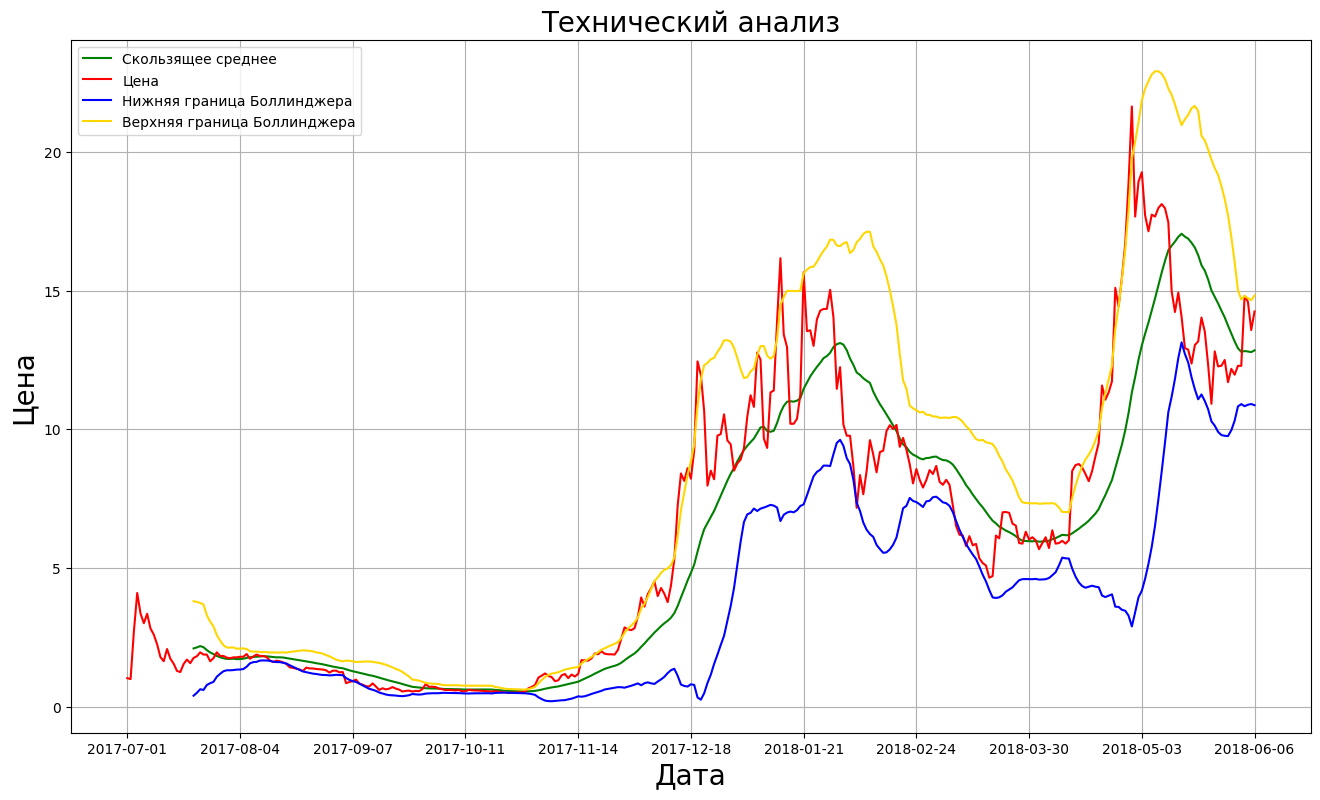

In [41]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

*Правило Боллинджера выполнено. Так как большая часть графика цены (≈95%) находится внутри границ, причём иногда, в моменты сильного подъема или резкого спада, происходит отражание от них.*

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [46]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig = plt.figure(figsize=(16, 7))
    ax = fig.add_subplot(111)

    plt.title('Общая капитализация монет', fontsize=20)
    ax.set_xlabel('Дата', size=20)
    ax.set_ylabel('Капитализация', size=20)

    for coin_symbol in symbols:
        curr_market = coins.loc[coins.symbol == coin_symbol, ['market']]
        curr_market = curr_market.loc[start_date:]
        ax.plot(curr_market.index, curr_market, label=coin_symbol)

    ax.set_xticks(curr_market.index.values[::curr_market.shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    print('\n')

    market_sum = coins.groupby(coins.index)['market'].sum()
    market_sum = market_sum.loc[start_date:]
    market_sum = pd.DataFrame(data=market_sum.values, columns=['market'], index=market_sum.index)

    fig = plt.figure(figsize=(16, 7))
    ax = fig.add_subplot(111)

    plt.title('Доля капитализации от общей капитализации рынка монет', fontsize=20)
    ax.set_xlabel('Дата', size=20)
    ax.set_ylabel('Доля капитализации', size=20)

    for coin_symbol in symbols:
        current_coin_market = coins.loc[coins.symbol == coin_symbol, ['market']]
        current_coin_market = current_coin_market.loc[start_date:]
        current_coin_market = current_coin_market / market_sum
        ax.plot(current_coin_market.index, current_coin_market, label=coin_symbol)

    ax.set_xticks(market_sum.index.values[::market_sum.shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

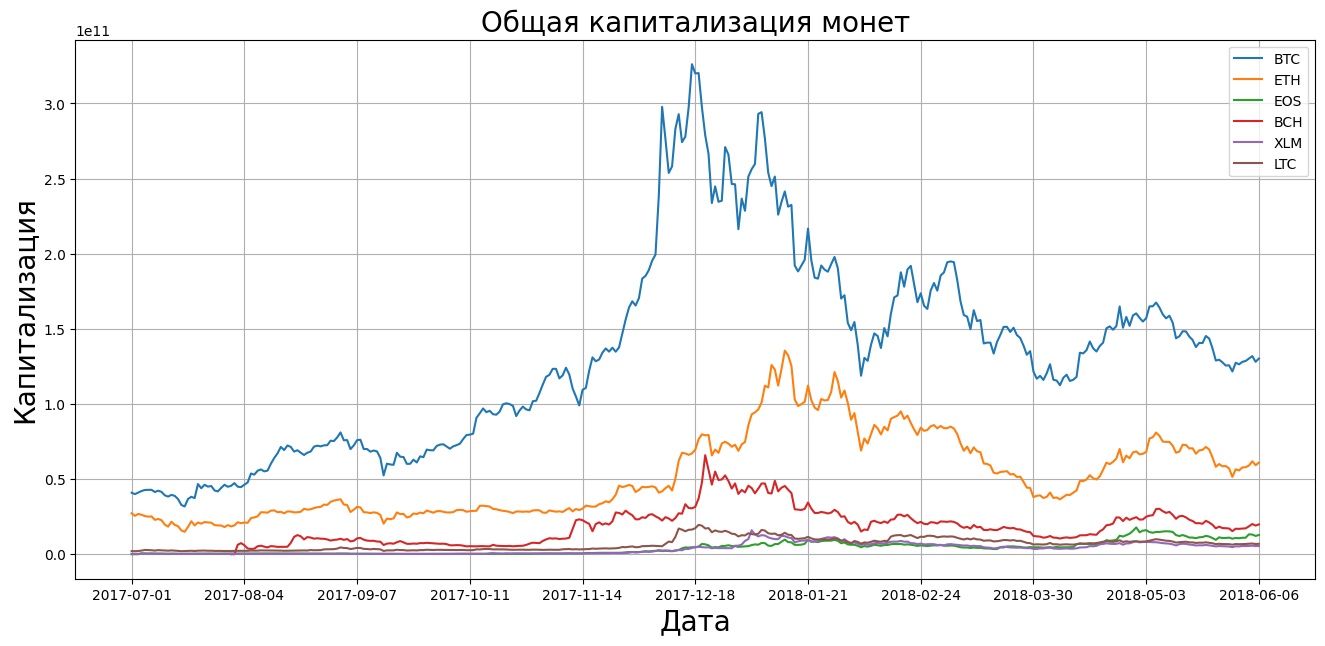

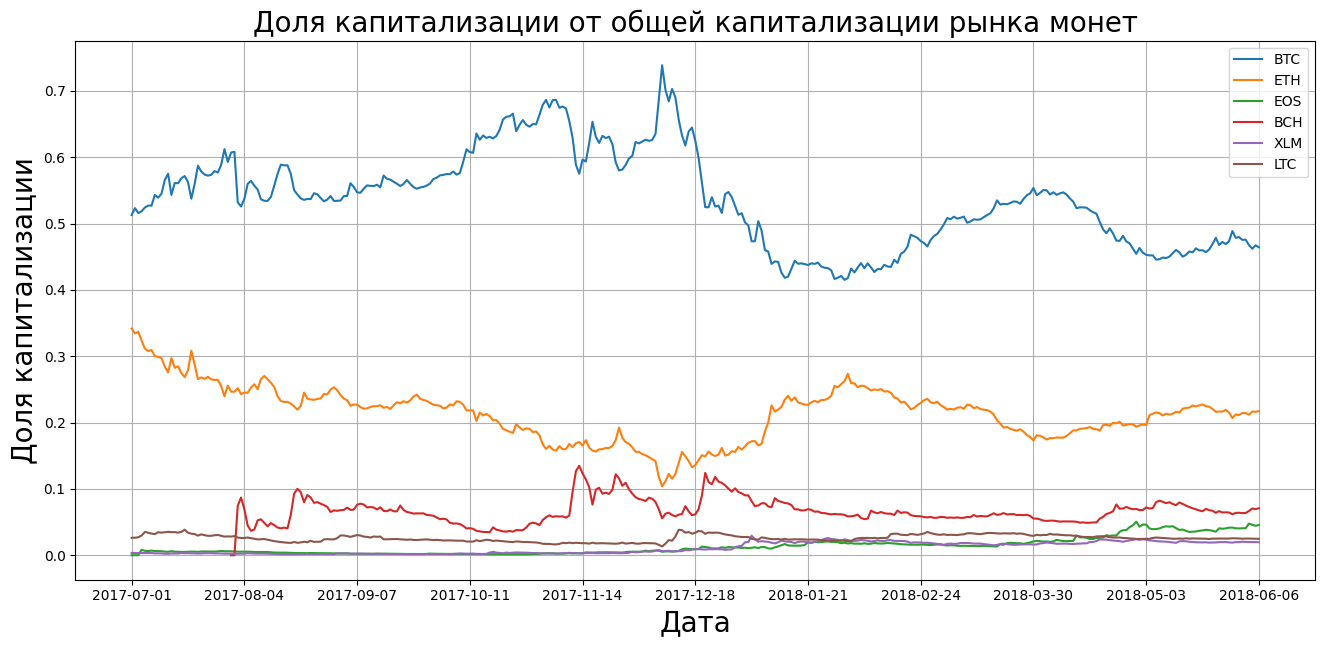

In [47]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

*Доля капитализации Биткоина во много больше, чем у остальных монет (альткойнов).*

*На графике "Общей капитализации монет" просматриваются схожие периоды подъема и спада.
На втором графике это также можно наблюдать, но в меньших объёмах*

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    #pass

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

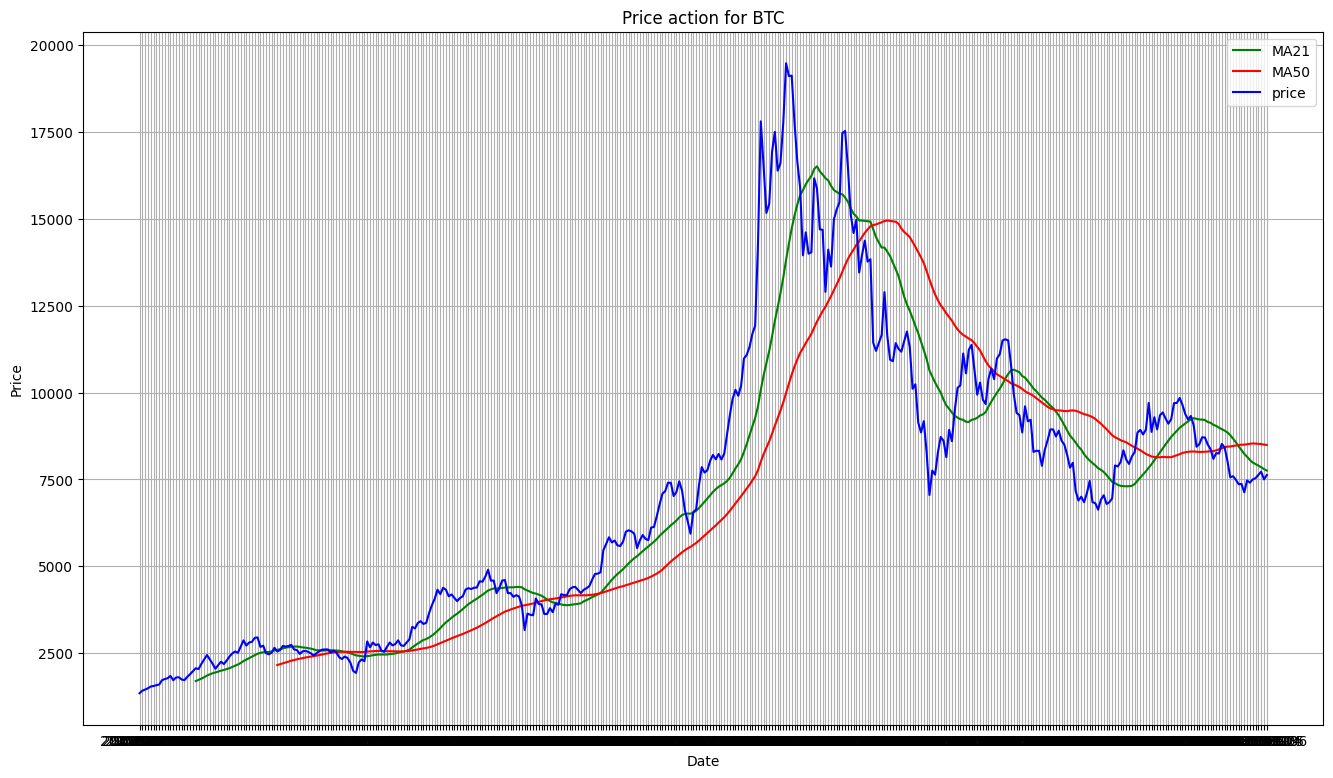

In [48]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # pass

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

**Ок.**